In [1]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
!pip install transformers
!pip install wget

     |████████████████████████████████| 2.0MB 7.1MB/s 
     |████████████████████████████████| 3.2MB 36.1MB/s 
     |████████████████████████████████| 890kB 54.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=2ecb98c3764170cd6fd10237e7a79a85ec0602d534c4bcccc5811eb6348ae57a
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=9785ad7bc003b363e731061ba4fe5773103e553adc1b7f59cfbfa5c19be60403
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [3]:
os.getcwd()

'/content'

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
!dir "gdrive/MyDrive/Colab Notebooks/cve.json"

gdrive/MyDrive/Colab\ Notebooks/cve.json


In [7]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [8]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [9]:
file_path = 'gdrive/MyDrive/Colab Notebooks/cve.json'
with open(file_path, 'r') as fp:
    data = json.load(fp) 
len(data)

150600

In [10]:
data[0]['cve']['description']['description_data'][0]['value']

'Sudo before 1.6.6 contains an off-by-one error that can result in a heap-based buffer overflow that may allow local users to gain root privileges via special characters in the -p (prompt) argument, which are not properly expanded.'

In [11]:
data[0]['cve']['CVE_data_meta']['ID']

'CVE-2002-0184'

In [12]:
data[10]['impact']['baseMetricV3']['impactScore']

5.9

In [13]:
data[10]['impact']['baseMetricV3']['cvssV3']

{'attackComplexity': 'LOW',
 'attackVector': 'LOCAL',
 'availabilityImpact': 'HIGH',
 'baseScore': 7.8,
 'baseSeverity': 'HIGH',
 'confidentialityImpact': 'HIGH',
 'integrityImpact': 'HIGH',
 'privilegesRequired': 'NONE',
 'scope': 'UNCHANGED',
 'userInteraction': 'REQUIRED',
 'vectorString': 'CVSS:3.1/AV:L/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H',
 'version': '3.1'}

In [14]:
text = list()
label = list()
for idx in range(len(data)):
    try:
        if data[idx].get('impact') and data[idx]['impact'].get('baseMetricV3'):   
#             print('ID: {}'.format(data[idx]['cve']['CVE_data_meta']['ID']))
#             for j, description in enumerate(data[idx]['cve']['description']['description_data']):
#                 print('[{}]-{}'.format(j, description['value']))

#             print('Impact Score: {}'.format(data[idx]['impact']['baseMetricV3']['impactScore']))
#             print('Attack Complexity: {}'.format(data[idx]['impact']['baseMetricV3']['cvssV3']['userInteraction']))
#             print('\n')
            text.append(' '.join([text['value'] for text in data[idx]['cve']['description']['description_data']]))

            label_i = 0
            pr = data[idx]['impact']['baseMetricV3']['cvssV3']['privilegesRequired']
            if pr == 'NONE':
              label_i = 0
            elif pr == 'LOW':
              label_i = 1
            else:
              label_i = 2
            label.append(label_i)
    except KeyError:
        print(idx)
        break

In [15]:
df = pd.DataFrame({'label': label, 'text': text})
df.shape

(77020, 2)

In [18]:
df.sample(10)

,label,text
53552,0,An issue was discovered in certain Apple produ...
33188,0,The csv-parse module before 4.4.6 for Node.js ...
54581,0,An issue was discovered in Joomla! before 3.9....
11989,0,Smanos W100 1.0.0 devices have Insecure Permis...
44138,0,The TIFFWriteDirectorySec() function in tif_di...
70007,0,An information disclosure vulnerability in the...
76693,0,Cross-site scripting (XSS) vulnerability in IB...
26249,2,Certain NETGEAR devices are affected by stored...
59109,0,The UPnP HTTP server on Sonos wireless speaker...
46111,2,The setSystemTime function in Foscam Cameras C...


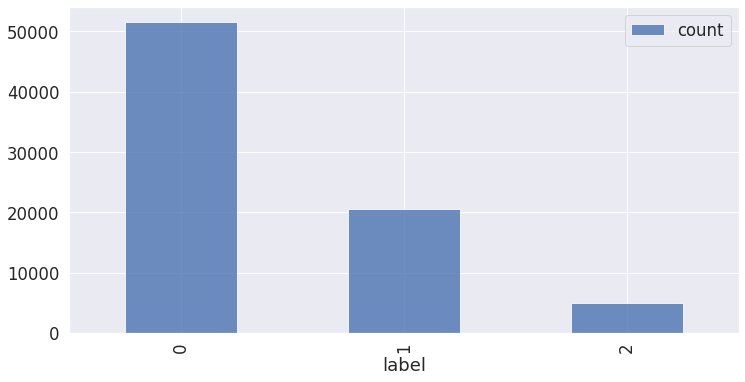

In [57]:
df_tmp = df.groupby('label').agg(['count']).reset_index()
df_tmp.columns = ['label', 'count']
df_tmp.plot(x='label', y='count', kind='bar', align='center', alpha=0.8)
plt.show()

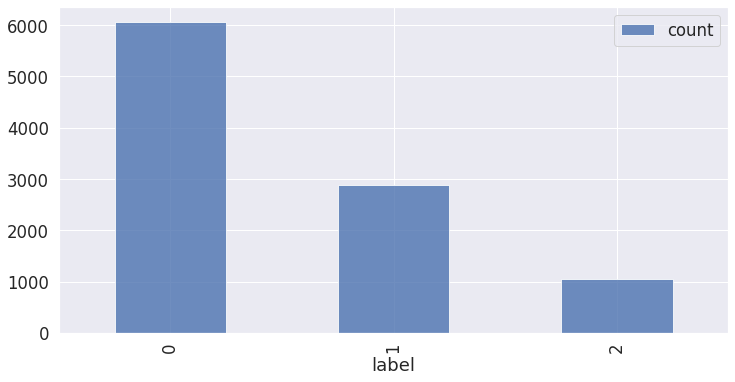

In [56]:
df_tmp = df[:10000].groupby('label').agg(['count']).reset_index()
df_tmp.columns = ['label', 'count']
df_tmp.plot(x='label', y='count', kind='bar', align='center', alpha=0.8)
plt.show()

In [20]:
sentences = df.text.values
labels = df.label.values

In [21]:
len(sentences), len(labels)

(77020, 77020)

In [22]:
sentences[0], labels[0]

('Stack-based buffer overflow in the jpc_tsfb_getbands2 function in jpc_tsfb.c in JasPer before 1.900.30 allows remote attackers to have unspecified impact via a crafted image.',
 0)

In [23]:
sentences = sentences[:10000]
labels = labels[:10000]

In [24]:
len(sentences), len(labels)

(10000, 10000)

In [25]:
sentences[0], labels[0]

('Stack-based buffer overflow in the jpc_tsfb_getbands2 function in jpc_tsfb.c in JasPer before 1.900.30 allows remote attackers to have unspecified impact via a crafted image.',
 0)

In [26]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [27]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  Stack-based buffer overflow in the jpc_tsfb_getbands2 function in jpc_tsfb.c in JasPer before 1.900.30 allows remote attackers to have unspecified impact via a crafted image.
Tokenized:  ['stack', '-', 'based', 'buffer', 'over', '##flow', 'in', 'the', 'jp', '##c', '_', 'ts', '##fb', '_', 'get', '##band', '##s', '##2', 'function', 'in', 'jp', '##c', '_', 'ts', '##fb', '.', 'c', 'in', 'jasper', 'before', '1', '.', '900', '.', '30', 'allows', 'remote', 'attackers', 'to', 'have', 'unspecified', 'impact', 'via', 'a', 'crafted', 'image', '.']
Token IDs:  [9991, 1011, 2241, 17698, 2058, 12314, 1999, 1996, 16545, 2278, 1035, 24529, 26337, 1035, 2131, 12733, 2015, 2475, 3853, 1999, 16545, 2278, 1035, 24529, 26337, 1012, 1039, 1999, 14791, 2077, 1015, 1012, 7706, 1012, 2382, 4473, 6556, 17857, 2000, 2031, 25851, 4254, 3081, 1037, 19275, 3746, 1012]


In [28]:
max_len = 0

# For every sentence...
for i, sent in enumerate(sentences):

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

    if len(input_ids) > 512:
      print(i)

print('Max sentence length: ', max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (1157 > 512). Running this sequence through the model will result in indexing errors


7
52
57
81
1197
2175
2848
2853
2945
3034
3036
4057
4624
5163
5166
5167
5168
6103
6815
8075
8079
8083
8092
8492
8496
8511
Max sentence length:  1672


In [29]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for i, sent in enumerate(sentences):
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 512,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2074: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  Stack-based buffer overflow in the jpc_tsfb_getbands2 function in jpc_tsfb.c in JasPer before 1.900.30 allows remote attackers to have unspecified impact via a crafted image.
Token IDs: tensor([  101,  9991,  1011,  2241, 17698,  2058, 12314,  1999,  1996, 16545,
         2278,  1035, 24529, 26337,  1035,  2131, 12733,  2015,  2475,  3853,
         1999, 16545,  2278,  1035, 24529, 26337,  1012,  1039,  1999, 14791,
         2077,  1015,  1012,  7706,  1012,  2382,  4473,  6556, 17857,  2000,
         2031, 25851,  4254,  3081,  1037, 19275,  3746,  1012,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,  

In [30]:
len(input_ids), len(attention_masks), len(labels)

(10000, 10000, 10000)

In [31]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

9,000 training samples
1,000 validation samples


In [32]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 8

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [33]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 3, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [34]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [35]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [36]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 2

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [37]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [38]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [39]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the 
        # output values prior to applying an activation function like the 
        # softmax.
        loss = result.loss
        logits = result.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 2 ========
Training...
  Batch    40  of  1,125.    Elapsed: 0:00:31.
  Batch    80  of  1,125.    Elapsed: 0:01:03.
  Batch   120  of  1,125.    Elapsed: 0:01:36.
  Batch   160  of  1,125.    Elapsed: 0:02:08.
  Batch   200  of  1,125.    Elapsed: 0:02:41.
  Batch   240  of  1,125.    Elapsed: 0:03:14.
  Batch   280  of  1,125.    Elapsed: 0:03:47.
  Batch   320  of  1,125.    Elapsed: 0:04:19.
  Batch   360  of  1,125.    Elapsed: 0:04:52.
  Batch   400  of  1,125.    Elapsed: 0:05:25.
  Batch   440  of  1,125.    Elapsed: 0:05:58.
  Batch   480  of  1,125.    Elapsed: 0:06:30.
  Batch   520  of  1,125.    Elapsed: 0:07:03.
  Batch   560  of  1,125.    Elapsed: 0:07:36.
  Batch   600  of  1,125.    Elapsed: 0:08:08.
  Batch   640  of  1,125.    Elapsed: 0:08:41.
  Batch   680  of  1,125.    Elapsed: 0:09:14.
  Batch   720  of  1,125.    Elapsed: 0:09:46.
  Batch   760  of  1,125.    Elapsed: 0:10:19.
  Batch   800  of  1,125.    Elapsed: 0:10:52.
  Batch   840  of

In [40]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.63,0.47,0.83,0:15:17,0:00:37
2,0.41,0.47,0.84,0:15:19,0:00:37


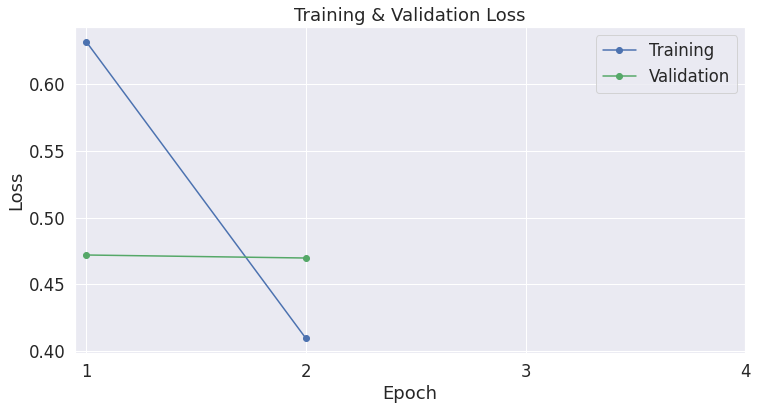

In [41]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [45]:
sentences = df.text.values
labels = df.label.values

# Create sentence and label lists
sentences = sentences[10000:12000]
labels = labels[10000:12000]

In [46]:
len(sentences), len(labels)

(2000, 2000)

In [48]:
# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(len(sentences)))

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 512,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 8  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test sentences: 2,000



/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2074: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [49]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 2,000 test sentences...
    DONE.


In [ ]:
# print('Positive samples: %d of %d (%.2f%%)' % (df.label.sum(), len(df.label), (df.label.sum() / len(df.label) * 100.0)))

In [ ]:
# print('Positive samples: %d of %d (%.2f%%)' % (df.label[10000:12000].sum(), len(df.label[10000:12000]), (df.label[10000:12000].sum() / len(df.label[10000:12000]) * 100.0)))

In [50]:
from sklearn.metrics import accuracy_score

len(predictions), len(true_labels)

(250, 250)

In [51]:
i = 120
np.argmax(predictions[i], axis=1).flatten(), true_labels[i]

(array([2, 0, 0, 0, 0, 0, 0, 0]), array([2, 0, 0, 0, 0, 0, 0, 1]))

In [52]:
from sklearn.metrics import accuracy_score

# Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

print(len(flat_true_labels))

accuracy = accuracy_score(flat_true_labels, flat_predictions)
count = accuracy_score(flat_true_labels, flat_predictions, normalize=False)

print('Accuracy: {}, Count: {}'.format(accuracy, count))

2000
Accuracy: 0.8195, Count: 1639


In [53]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = './model_save/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))

Saving model to ./model_save/


('./model_save/tokenizer_config.json',
 './model_save/special_tokens_map.json',
 './model_save/vocab.txt',
 './model_save/added_tokens.json')

In [54]:
!ls -l --block-size=K ./model_save/

total 428008K
-rw-r--r-- 1 root root      1K Mar 21 21:48 config.json
-rw-r--r-- 1 root root 427762K Mar 21 21:48 pytorch_model.bin
-rw-r--r-- 1 root root      1K Mar 21 21:48 special_tokens_map.json
-rw-r--r-- 1 root root      1K Mar 21 21:48 tokenizer_config.json
-rw-r--r-- 1 root root    227K Mar 21 21:48 vocab.txt


In [55]:
# Copy the model files to a directory in your Google Drive.
!cp -r ./model_save/ "./gdrive/MyDrive/Colab Notebooks/bert_pr/"